In [2]:
import pandas as pd
import torch
import numpy as np
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# Pytorch practice

In [3]:
# Preparing datset
train = pd.read_csv("train.csv", dtype = np.float32)
targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != "label"].values/255 #normalization

In [4]:
# train_test_split 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy, 
                                                                              targets_numpy, 
                                                                              test_size = 0.2,
                                                                              random_state = 42)

In [5]:
# creating tensors for train and test sets
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # torch learning as Long

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

In [6]:
# evaluating batch_size, epochs
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / (batch_size))
num_epochs = int(num_epochs)

In [7]:
# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

In [8]:
# Data loader
train_loader = DataLoader(train, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

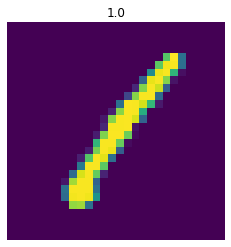

In [9]:
# visualize
plt.imshow(features_numpy[0].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[0]))
plt.show()

### Logistic Regression Model

In [171]:
# Creating class of Logistic Regression Model
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        
        self.linear = nn.Linear(input_dim, output_dim)
        
    
    def forward(self, x):
        out = self.linear(x)
        return out

In [1]:
# creating model
input_dim = 28*28 # figure size
output_dim = 10 # label size

model = LogisticRegression(input_dim, output_dim)

# Loss
error = nn.CrossEntropyLoss()

# Optimizer
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

NameError: name 'LogisticRegression' is not defined

In [219]:
# Training model
def model_train(model, criterion, optimizer, train_loader, test_loader, epochs = 10000):
    count = 0
    loss_list = []
    iteration_list = []
    accuracy_list = []
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
        
            train = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
        
            optimizer.zero_grad()
        
            outputs = model(train)
        
            loss = error(outputs, labels)
        
            loss.backward()
        
            optimizer.step()
        
            count += 1
        
            # Predicitons
            if count % 50 == 0:
                # Calculate Accuracy
                correct = 0
                total = 0
            
                # Predict test
                for images, labels in test_loader:
                    test = Variable(images.view(-1, 28*28))
                
                    # Forward
                    outputs = model(test)
                
                    # Get prediction as maximum of probs
                    predicted = torch.max(outputs.data, 1)[1]
                
                    # Total number of labels
                    total += len(labels)
                
                    # Total correct predictions
                    correct += (predicted == labels).sum()
                
                accuracy = correct * 100 / float(total)
            
                # store loss, accuracy and iteration
                loss_list.append(loss.data)
                accuracy_list.append(accuracy)
                iteration_list.append(count)
            
            if count % 500 == 0:
                print(f"Iteration: {count}  Loss: {loss.data}  Accuracy: {int(accuracy)}%")
                
    # visualization loss 
    plt.plot(iteration_list,loss_list)
    plt.xlabel("Number of iteration")
    plt.ylabel("Loss")
    plt.title("ANN: Loss vs Number of iteration")
    plt.show()
    
    # visualization accuracy 
    plt.plot(iteration_list,accuracy_list,color = "red")
    plt.xlabel("Number of iteration")
    plt.ylabel("Accuracy")
    plt.title("ANN: Accuracy vs Number of iteration")
    plt.show()

                
    return model

Iteration: 500  Loss: 1.8088091611862183  Accuracy: 67%
Iteration: 1000  Loss: 1.6048333644866943  Accuracy: 75%
Iteration: 1500  Loss: 1.279893159866333  Accuracy: 78%
Iteration: 2000  Loss: 1.200177788734436  Accuracy: 80%
Iteration: 2500  Loss: 1.0294324159622192  Accuracy: 81%
Iteration: 3000  Loss: 0.9255101680755615  Accuracy: 82%
Iteration: 3500  Loss: 0.896333634853363  Accuracy: 82%
Iteration: 4000  Loss: 0.7485110759735107  Accuracy: 83%
Iteration: 4500  Loss: 0.9645856618881226  Accuracy: 83%
Iteration: 5000  Loss: 0.7982501983642578  Accuracy: 84%
Iteration: 5500  Loss: 0.7533206343650818  Accuracy: 84%
Iteration: 6000  Loss: 0.871523380279541  Accuracy: 84%
Iteration: 6500  Loss: 0.6603485941886902  Accuracy: 84%
Iteration: 7000  Loss: 0.7255089282989502  Accuracy: 85%
Iteration: 7500  Loss: 0.6364325881004333  Accuracy: 85%
Iteration: 8000  Loss: 0.7352423667907715  Accuracy: 85%
Iteration: 8500  Loss: 0.5444234609603882  Accuracy: 85%
Iteration: 9000  Loss: 0.65899085998

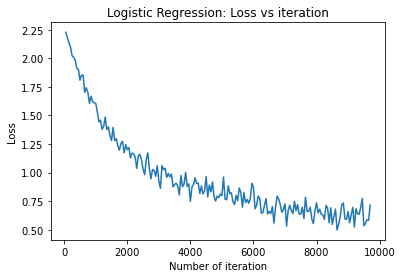

In [174]:
model = model_train(model, error, optimizer, train_loader, test_loader, num_epochs)

In [148]:
def make_test_dataset_predictions(model):
    test = pd.read_csv("test.csv", dtype = np.float32)
    test = test.values/255 # normalization
    
    # to pytorch.tensor from numpy.ndarray
    test = torch.from_numpy(test)
    
    # Forward propagation
    outputs = model(test)
                
    # Get predictions from the maximum value
    predicted = torch.max(outputs.data, 1)[1]
    
    submission = pd.DataFrame(data={
        "ImageId": list(range(1, test.shape[0]+1)),
        "Label": predicted
    })
    
    submission.to_csv("Submission.csv", index=False)

In [149]:
make_test_dataset_predictions(model)

### NN model

In [216]:
class NNModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(NNModel, self).__init__()
        
        hidden_dim = 150
        
        # Linear 1: 784 -> hidden_dim
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear 2: hidden_dim -> hidden_dim
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear 3: hidden_dim -> hidden_dim
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear 4 (readout): hidden_dim -> hidden_dim
        self.fc4 = nn.Linear(hidden_dim, output_dim)
        
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        
        return out

In [221]:
# Create NN
model = NNModel(28*28, 10)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
lr = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

Iteration: 500  Loss: 0.8346293568611145  Accuracy: 77%
Iteration: 1000  Loss: 0.4676189124584198  Accuracy: 87%
Iteration: 1500  Loss: 0.24014167487621307  Accuracy: 89%
Iteration: 2000  Loss: 0.3071320652961731  Accuracy: 90%
Iteration: 2500  Loss: 0.31691622734069824  Accuracy: 92%
Iteration: 3000  Loss: 0.1303427666425705  Accuracy: 92%
Iteration: 3500  Loss: 0.24995025992393494  Accuracy: 93%
Iteration: 4000  Loss: 0.06574717909097672  Accuracy: 94%
Iteration: 4500  Loss: 0.2967472970485687  Accuracy: 94%
Iteration: 5000  Loss: 0.10641510039567947  Accuracy: 94%
Iteration: 5500  Loss: 0.1821921020746231  Accuracy: 95%
Iteration: 6000  Loss: 0.191897451877594  Accuracy: 95%
Iteration: 6500  Loss: 0.10413765907287598  Accuracy: 95%
Iteration: 7000  Loss: 0.12376347184181213  Accuracy: 95%
Iteration: 7500  Loss: 0.12565621733665466  Accuracy: 95%
Iteration: 8000  Loss: 0.1974135786294937  Accuracy: 95%
Iteration: 8500  Loss: 0.06126187741756439  Accuracy: 96%
Iteration: 9000  Loss: 0

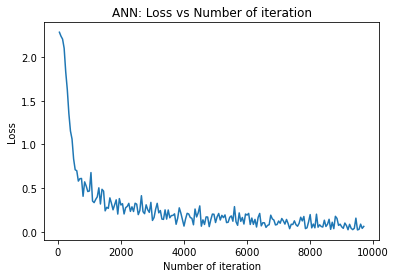

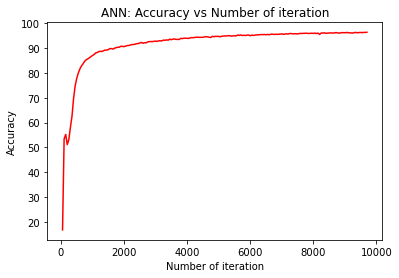

In [222]:
model = model_train(model, error, optimizer, train_loader, test_loader, num_epochs)

In [223]:
make_test_dataset_predictions(model)

## CNN

In [10]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        
        # Convolution 1
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
     
        # Convolution 2
        self.cnn2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=0)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1
        self.fc1 = nn.Linear(32 * 4 * 4, 10)
        
    
    def forward(self, x):
        # Convolution 1
        out = self.cnn1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.cnn2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Linear function (readout)
        out = self.fc1(out)
        
        return out

In [11]:
# batch_size, epoch and iteration
batch_size = 100
n_iters = 2500
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)
    
# Create CNN
model = CNNModel()

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [12]:
# CNN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        train = Variable(images.view(100,1,28,28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                
                test = Variable(images.view(100,1,28,28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.1418929100036621  Accuracy: 96.19047546386719 %
Iteration: 1000  Loss: 0.04162941500544548  Accuracy: 97.71428680419922 %
Iteration: 1500  Loss: 0.02317539043724537  Accuracy: 97.77381134033203 %
Iteration: 2000  Loss: 0.01472919899970293  Accuracy: 98.3452377319336 %


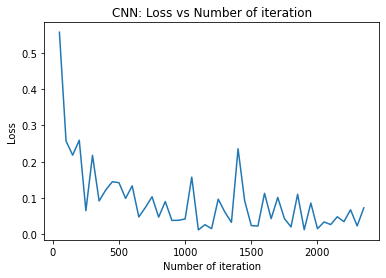

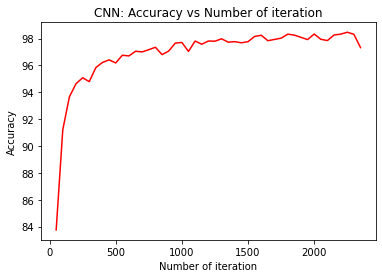

In [13]:
# visualization loss 
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

In [14]:
# make predictions
test = pd.read_csv("test.csv", dtype = np.float32)
test = test.values/255 # normalization
    
# to pytorch.tensor from numpy.ndarray
test = torch.from_numpy(test)
test = Variable(test.view(28000,1,28,28)) #  НЕ ПОВТОРЯТЬ ТАКОЕ ДОМА, МИНУС ОПЕРАТИВА
    
# Forward propagation
outputs = model(test)
                
# Get predictions from the maximum value
predicted = torch.max(outputs.data, 1)[1]
    
submission = pd.DataFrame(data={
    "ImageId": list(range(1, test.shape[0]+1)),
    "Label": predicted
})
    
submission.to_csv("Submission.csv", index=False)